In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Generate input data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [4]:
x = 2 * np.random.randn(100,1)

In [5]:
y = 4 + 3* x + np.random.randn(100,1)

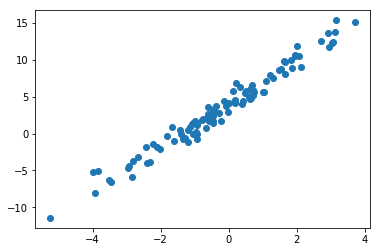

In [6]:
plt.plot(x,y,'o')
plt.show()

### Calculating coefficients using batch gradient descent.

In [7]:
x_ones = np.c_[np.ones((100,1)),x]

In [8]:
x_ones

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675],
       [ 1.        , -0.46827391],
       [ 1.        ,  3.15842563],
       [ 1.        ,  1.53486946],
       [ 1.        , -0.93894877],
       [ 1.        ,  1.08512009],
       [ 1.        , -0.92683539],
       [ 1.        , -0.93145951],
       [ 1.        ,  0.48392454],
       [ 1.        , -3.82656049],
       [ 1.        , -3.44983567],
       [ 1.        , -1.12457506],
       [ 1.        , -2.02566224],
       [ 1.        ,  0.62849467],
       [ 1.        , -1.81604815],
       [ 1.        , -2.8246074 ],
       [ 1.        ,  2.93129754],
       [ 1.        , -0.4515526 ],
       [ 1.        ,  0.13505641],
       [ 1.        , -2.84949637],
       [ 1.        , -1.08876545],
       [ 1.        ,  0.22184518],
       [ 1.        , -2.30198715],
       [ 1.        ,  0.75139604],
       [ 1.        ,

Initialize the values of learning rate and total number of iterations.

In [9]:
eta = 0.1
num_iter = 100

Randomly initialize the values of theta(coefficients)

In [10]:
coeffs = np.random.randn(2,1)

In [11]:
coeffs

array([[0.35778736],
       [0.56078453]])

Let's calculate the coefficients using batch gradient descent

In [14]:
n = len(x_ones)

In [16]:
for i in range(num_iter):
    gradients = 2/n*x_ones.T.dot(x_ones.dot(coeffs)-y)
    coeffs = coeffs - eta * gradients

In [17]:
coeffs

array([[4.00742783],
       [2.92837142]])

### Let's predict for new instances.

In [61]:
x_new = np.array([[0],[2]])

In [62]:
x_new

array([[0],
       [2]])

In [63]:
x_new_ones = np.c_[np.ones((2,1)),x_new]

In [64]:
x_new_ones

array([[1., 0.],
       [1., 2.]])

In [65]:
y_predict = x_new_ones.dot(coeffs)

In [66]:
y_predict

array([[4.00742783],
       [9.86417067]])

### Let's plot the predictions.

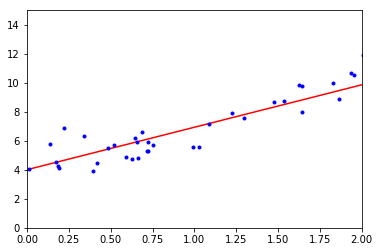

In [67]:
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

---

### Let's use sklearn and check the coefficients

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lin_reg = LinearRegression()

In [70]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lin_reg.intercept_,lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

The coefficients are exactly same.

### Let's predict using the fitted model and compare the values with the previous predictions

In [72]:
new_instances = np.array([[0],[2]])

In [73]:
lin_reg.predict(new_instances)

array([[4.00742783],
       [9.86417067]])

The predicted values are same as well.